<a href="https://colab.research.google.com/github/skeleton111222/NaiveBayes-TextClassification/blob/main/NaiveBayes_TextClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification of Text Documents using Naive Bayes**

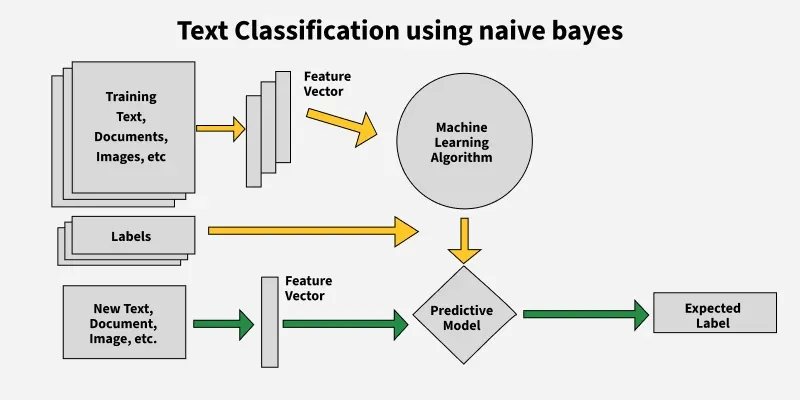

The dataset will be of text data categorized into four labels: Technology, Sports, Politics and Entertainment. Each entry contains a short sentence or statement related to a specific topic with the label indicating the category it belongs to.

# **Importing Libraries**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

Here we import necessary libraries for:-
| **Import**                           | **Used For (Purpose)**                                    |
| ------------------------------------ | --------------------------------------------------------- |
| `pandas as pd`                       | Reading and handling datasets (`read_csv`, data cleaning) |
| `numpy as np`                        | Numerical operations, arrays, `np.unique()`               |
| `matplotlib.pyplot as plt`           | Creating plots and graphs                                 |
| `seaborn as sns`                     | Advanced visualizations (heatmaps, confusion matrix)      |
| `train_test_split`                   | Splitting data into training and testing sets             |
| `CountVectorizer`                    | Converting text data into numerical form (Bag of Words)   |
| `MultinomialNB`                      | Naive Bayes model for text classification                 |
| `accuracy_score`                     | Calculating model accuracy                                |
| `confusion_matrix`                   | Evaluating predictions (TP, FP, FN, TN)                   |

# **Loading the Dataset**

In [2]:
data= pd.read_csv('synthetic_text_data.csv')
X = data['text']
y = data['label']

# **Splitting the Data**

The training set is used to train the model while the testing set is used to evaluate its performance.

* **train_test_split**: Splits the data into `training (80%)` and `testing (20%)` sets.
* **random_state**: ensures reproducibility.





In [3]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# **Text Preprocessing: Converting Text to Numeric Features**

We need to convert the text data into numerical format before feeding it to the model. We use CountVectorizer to convert the text into a matrix of token counts.

* `CountVectorizer()`: Converts the raw text into a matrix of word counts.
* `fit_transform()`: Learns the vocabulary from the training data and transforms the text into vector.
* `transform()`: Applies the learned vocabulary from the training data to the test data.

In [4]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# **Training the Naive Bayes Classifier**

In the right format we train the Naive Bayes classifier on the training data.
We use Multinomial Naive Bayes

**Multinomial Naive Bayes** is a variant of the Naive Bayes classifier specifically suited for classification tasks where the features or input data are discrete such as word counts or frequencies in text classification.

In [5]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

# **Making Predictions**

After Model is trained we use it to predict the labels for the test data using X_test_vectorized.

In [6]:
y_pred= model.predict(X_test_vectorized)

# **Evaluating the Model**

After making predictions we evaluate the model's performance by calculating the accuracy and confusion matrix to understand how well the model is performing.

* `accuracy_score()`: Calculates the accuracy of the model by comparing the predicted labels `(y_pred)` with the true labels `(y_test)`.
* `confusion_matrix():` Generates a confusion matrix to visualize how well the model classifies each category.





Accuracy: 88.23529411764706%


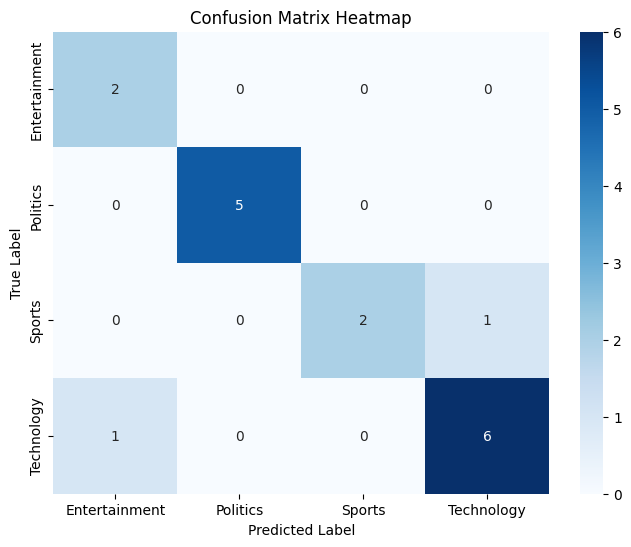

In [11]:
accuracy= accuracy_score(y_test, y_pred)
conf_matrix= confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy *100}%')

class_labels= np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The model achieved an accuracy of about 88%, meaning it correctly predicted most of the test data. The confusion matrix shows that the model made correct predictions for Sports, Technology, Politics, and Entertainment, which appear as darker values on the heatmap. However, there were a few cases where the model made incorrect predictions.

# **Prediction on Unseen Data**

Testing / Predicting on user data / input

In [16]:
user_input = ("I am learning machine learning")

user_input_vectorized = vectorizer.transform([user_input])
predicted_label = model.predict(user_input_vectorized)
print(f"The input text belongs to the '{predicted_label[0]}' category.")

The input text belongs to the 'Technology' category.


In [15]:
user_input = ("The actor spoke about government policies during the award show")

user_input_vectorized = vectorizer.transform([user_input])
predicted_label = model.predict(user_input_vectorized)
print(f"The input text belongs to the '{predicted_label[0]}' category.")

The input text belongs to the 'Politics' category.


**Conclusion:**
Here we can see our model is working fine and can predict on unseen data accurately. Naive Bayes is a useful model for text classification tasks especially when the dataset is large and the features (words) are relatively independent.